# User Activity Analysis -Web Analytics
 
Background: Company Digital team tracks behavior of web visitors on website. The data gives information about web activity of our online visitors sourced from Paid Search over a month. This analysis covered following items:
1. EDA to discover and understand data
2. data processing and feature engineering: remove non predictive features, outlier processing, one-hot encoding for categorical features, feature selection to handle multicolliearity
3. fitting model to predict whether use would submit lead form, tune parameters and compare model performance
4. conclusion and suggestions


Dataset Dictionary:
1. 'Visitor_Identifier': Website visitor ID
2. 'Avg_Session_Duration': Average session duration
3. 'avg_time_on_page': Average time spent per page
4. 'Channel_Grouping': shows channel of website visitor
5. 'device_category': shows what the type of device that web visitors is on
6. 'non_shopper': if Yes, then they visited a login page on ADP website
7. 'Pages_Session':# pages persession
8. 'pageviews': total number of pages viewed
9. 'Session_1plus_minute': # sessions with >1 minutes
10. 'Session_3plus_minutes': # sessions with >3 minutes
11. 'Session_3plus_pages': # sessions with > 3 pages
12. 'Session_5plus_minutes': # sessions with >5 minutes 
13. 'Session_5plus_pages': # sessions with > 5 pages
14. 'session_duration': Total Session Duration
15. 'sessions': Total number of sessions per visitor
16. 'Unique_Views2_BU': business unit content group
17. 'user_type': shows if the visitor is new or returning visitor
18. 'Lead _Form_submission': target variable; show if a lead form was submitted

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('CaseSTudy_2_data.xlsx', header=0)

In [3]:
df.head()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead _Form_submission
0,1.767882e+09,210.00,210.0,Paid Search,desktop,Yes,2.0,8,1,1,1,1,0,840,4,0,Returning Visitor,0
1,1.604589e+09,0.00,0.0,Paid Search,desktop,No,1.0,10,0,0,0,0,0,0,10,0,Returning Visitor,0
2,1.515450e+09,108.33,54.0,Paid Search,desktop,Yes,3.0,9,1,1,1,1,1,325,3,0,Returning Visitor,0
3,4.077739e+08,15.00,0.0,Paid Search,desktop,No,1.0,2,0,0,0,0,0,30,2,0,Returning Visitor,0
4,1.070705e+09,0.00,0.0,Paid Search,mobile,No,1.0,1,0,0,0,0,0,0,1,0,New Visitor,0


In [4]:
df.shape

(49420, 18)

In [5]:
df.columns

Index(['Visitor_Identifier', 'Avg_Session_Duration', 'avg_time_on_page',
       'Channel_Grouping', 'device_category', 'non_shopper', 'Pages_Session',
       'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
       'session_duration', 'sessions', 'Unique_Views2_BU', 'user_type',
       'Lead _Form_submission'],
      dtype='object')

In [6]:
df.describe()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,Lead _Form_submission
count,4.942000e+04,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000
mean,1.167656e+09,38.668704,19.474152,1.284176,1.655382,0.131263,0.064265,0.037637,0.044699,0.013031,65.874788,1.221307,0.016451,0.036524
std,6.412695e+08,145.379037,100.682034,0.907565,3.771735,0.501712,0.389254,0.283146,0.336092,0.140361,452.519804,2.318114,0.147668,0.187591
min,9.627014e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.045923e+08,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.218846e+09,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.747473e+09,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000
max,2.147434e+09,5144.500000,3080.000000,39.000000,340.000000,31.000000,26.000000,15.000000,23.000000,7.000000,34608.000000,340.000000,6.000000,1.000000


note: among numeric metrics, max values are in a much bigger scale comaring with 75% and 50% percentiles. There are outliers in these variables. 
for models affected by outliers including regression, these outliers need to be processed to achieve better model fitting. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 18 columns):
Visitor_Identifier       49420 non-null float64
Avg_Session_Duration     49420 non-null float64
avg_time_on_page         49420 non-null float64
Channel_Grouping         49420 non-null object
device_category          49420 non-null object
non_shopper              49420 non-null object
Pages_Session            49420 non-null float64
pageviews                49420 non-null int64
Session_1plus_minute     49420 non-null int64
Session_3plus_minutes    49420 non-null int64
Session_3plus_pages      49420 non-null int64
Session_5plus_minutes    49420 non-null int64
Session_5plus_pages      49420 non-null int64
session_duration         49420 non-null int64
sessions                 49420 non-null int64
Unique_Views2_BU         49420 non-null int64
user_type                49420 non-null object
Lead _Form_submission    49420 non-null int64
dtypes: float64(4), int64(10), object(4)
memory usa

there are four categorical features, others are numerical.

In [8]:
# rename column Lead _Form_submission to remove extra space 
df.rename(columns={'Lead _Form_submission':'Lead_Form_submission'}, inplace=True)

In [9]:
# check target variable value distribution
target_count = df.Lead_Form_submission.value_counts()
target_count

0    47615
1     1805
Name: Lead_Form_submission, dtype: int64

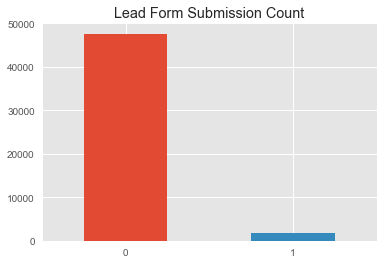

In [10]:
df.Lead_Form_submission.value_counts().plot.bar(title='Lead Form Submission Count', rot=0)

In [11]:
print('No Lead Form Submission Proportion: ', round(target_count[0] / target_count[1], 2), ': 1')
print('Percentage of user submit lead form: ', round(target_count[1] / df.shape[0], 4)*100, '%')

No Lead Form Submission Proportion:  26.38 : 1
Percentage of user submit lead form:  3.65 %


Note: target variable shows an inbalance distribution over 0 and 1 values that less than 4% records have target value 1

## EDA to examine each column

In [12]:
df[['Avg_Session_Duration', 'avg_time_on_page']].describe()

,Avg_Session_Duration,avg_time_on_page
count,49420.000000,49420.000000
mean,38.668704,19.474152
std,145.379037,100.682034
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,30.000000,0.000000
max,5144.500000,3080.000000


Note: these two features are usually good indicators of users interests to the site. there are outliers from the percentile distribution. Look further details into them.

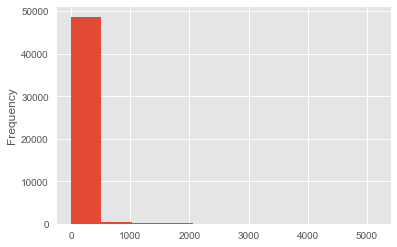

In [13]:
df.Avg_Session_Duration.plot.hist()

In [14]:
print('Number of records with 0 Average session duration: ', df[df['Avg_Session_Duration']==0].shape[0])
print('Number of records with 0 Average time on page: ', df[df['avg_time_on_page']==0].shape[0])

Number of records with 0 Average session duration:  27100
Number of records with 0 Average time on page:  40944


In [15]:
df[(df['Avg_Session_Duration']==0) & (df['Lead_Form_submission']==1)]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission
42,1.068404e+09,0.0,0.0,Paid Search,desktop,No,0.0,0,0,0,0,0,0,0,1,0,Returning Visitor,1
7073,1.242524e+09,0.0,0.0,Paid Search,desktop,No,1.0,2,0,0,0,0,0,0,2,0,Returning Visitor,1
41702,7.315469e+08,0.0,0.0,Paid Search,desktop,No,1.0,1,0,0,0,0,0,0,1,0,Returning Visitor,1


Note: a visitor with avg session duration = 0 would not be a normal user. highly likely these are bot traffic and doesn't lead to form submission. 
only 3 records show Lead_Form_submission which is sysbicious and can be ignored.
To ensure the analysis is conducted on visits from actual users, these part of records is dropped. 

In [16]:
# remove suspicious bot traffic records
df = df[df['Avg_Session_Duration']>0]

In [17]:
df.shape

(22320, 18)

In [18]:
df.Lead_Form_submission.value_counts()

0    20518
1     1802
Name: Lead_Form_submission, dtype: int64

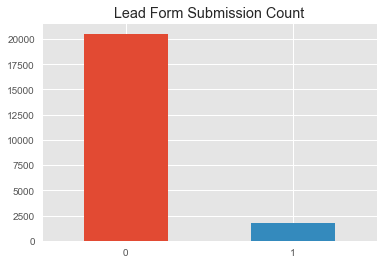

In [19]:
df.Lead_Form_submission.value_counts().plot.bar(title='Lead Form Submission Count', rot=0)
plt.show()

In [20]:
df.describe()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,Lead_Form_submission
count,2.232000e+04,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000
mean,1.171300e+09,85.618609,43.118844,1.636760,2.404525,0.290636,0.142294,0.083333,0.098970,0.028853,145.857168,1.432751,0.028943,0.080735
std,6.433338e+08,206.827343,146.374886,1.259972,5.500394,0.714863,0.569553,0.416784,0.494713,0.207764,664.640450,3.404474,0.201400,0.272433
min,9.627014e+04,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.058467e+08,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000
50%,1.221081e+09,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000
75%,1.757128e+09,53.000000,22.812500,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.250000,1.000000,0.000000,0.000000
max,2.147434e+09,5144.500000,3080.000000,39.000000,340.000000,31.000000,26.000000,15.000000,23.000000,7.000000,34608.000000,340.000000,6.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


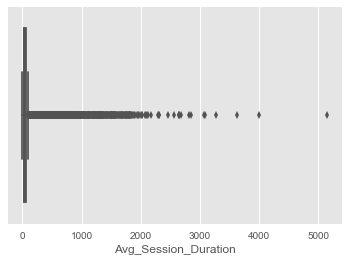

In [21]:
# check outliers
sns.boxplot(df.Avg_Session_Duration)

In [22]:
features = ['Avg_Session_Duration', 'avg_time_on_page',
       'Pages_Session', 'pageviews', 'Session_1plus_minute',
       'Session_3plus_minutes', 'Session_3plus_pages', 'Session_5plus_minutes',
       'Session_5plus_pages', 'session_duration', 'sessions',
       'Unique_Views2_BU']


In [23]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg_Session_Duration     32.0000
avg_time_on_page         22.8125
Pages_Session             1.0000
pageviews                 1.0000
Session_1plus_minute      0.0000
Session_3plus_minutes     0.0000
Session_3plus_pages       0.0000
Session_5plus_minutes     0.0000
Session_5plus_pages       0.0000
session_duration         37.2500
sessions                  0.0000
Unique_Views2_BU          0.0000
dtype: float64


In [24]:
Upper = Q3+1.5*IQR
print('Upper Limit for Numeric Features: \n', Upper)

Upper Limit for Numeric Features: 
 Avg_Session_Duration     101.00000
avg_time_on_page          57.03125
Pages_Session              3.50000
pageviews                  3.50000
Session_1plus_minute       0.00000
Session_3plus_minutes      0.00000
Session_3plus_pages        0.00000
Session_5plus_minutes      0.00000
Session_5plus_pages        0.00000
session_duration         119.12500
sessions                   1.00000
Unique_Views2_BU           0.00000
dtype: float64


In [25]:
print('Max values for Numeric Features: \n', df[features].max())

Max values for Numeric Features: 
 Avg_Session_Duration      5144.5
avg_time_on_page          3080.0
Pages_Session               39.0
pageviews                  340.0
Session_1plus_minute        31.0
Session_3plus_minutes       26.0
Session_3plus_pages         15.0
Session_5plus_minutes       23.0
Session_5plus_pages          7.0
session_duration         34608.0
sessions                   340.0
Unique_Views2_BU             6.0
dtype: float64


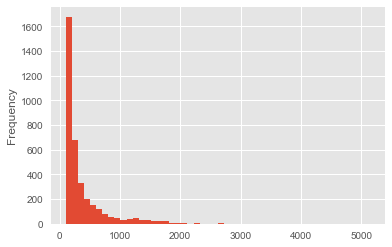

In [26]:
# Avg_session_duration distribution for values greater than upper limit
df[df['Avg_Session_Duration']>Upper['Avg_Session_Duration']].Avg_Session_Duration.plot.hist(bins=50)

In [27]:
df.groupby(['Lead_Form_submission']).Avg_Session_Duration.mean()

Lead_Form_submission
0     71.005638
1    252.005361
Name: Avg_Session_Duration, dtype: float64

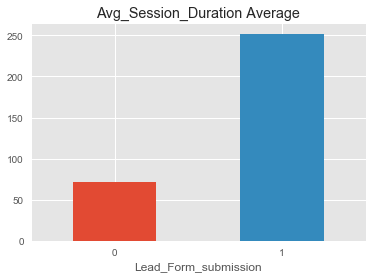

In [28]:
df.groupby(['Lead_Form_submission']).Avg_Session_Duration.mean().plot.bar(title='Avg_Session_Duration Average', rot=0)
plt.show()

Note: Avg_Session_Duration has different distribution between users submitted lead form and those didn't. This feature can be a good predictor

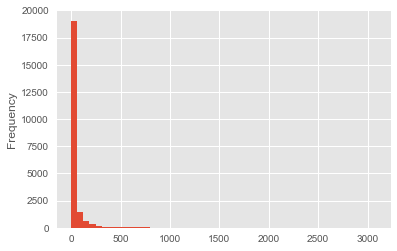

In [29]:
df.avg_time_on_page.plot.hist(bins=50)

In [30]:
df[(df['avg_time_on_page']==0)].shape

(13844, 18)

In [31]:
df[(df['avg_time_on_page']==0) & (df['Lead_Form_submission']==1)].shape[0]

32

Note: many records' avarage time on page is 0, including 32 which has lead form submitted. 
This need some investigation to understand how this feature was calculated. 
since there is no extra information here, leave this feature as it is now. 

In [32]:
df.groupby(['Lead_Form_submission']).avg_time_on_page.mean()

Lead_Form_submission
0     33.218302
1    155.848762
Name: avg_time_on_page, dtype: float64

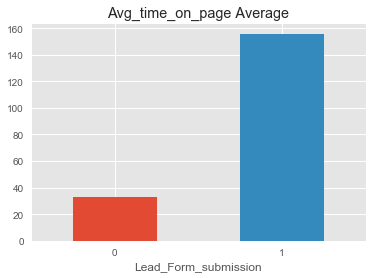

In [33]:
df.groupby(['Lead_Form_submission']).avg_time_on_page.mean().plot.bar(title='Avg_time_on_page Average', rot=0)
plt.show()

Note: Avg_Session_Duration and avg_time_on_page look like having some impact to wheter user submitted lead form. Both features have many outliders which will be processed later. 

In [34]:
df.Channel_Grouping.value_counts() 

Paid Search    22320
Name: Channel_Grouping, dtype: int64

Note: all records are paid Search. this feature has no prediction power and need to be removed.

In [35]:
dc = df['device_category'].value_counts()/df.shape[0]
dc

desktop    0.528495
mobile     0.422133
tablet     0.049373
Name: device_category, dtype: float64

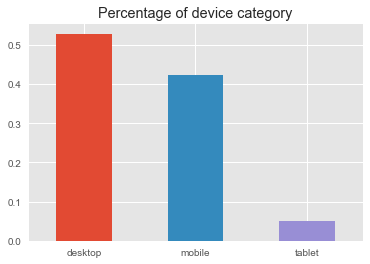

In [36]:
dc.plot.bar(title='Percentage of device category', rot=0)
plt.show()

In [37]:
df[['device_category', 'Lead_Form_submission']].groupby(['device_category']).mean()

,Lead_Form_submission
device_category,
desktop,0.089946
mobile,0.070579
tablet,0.068966


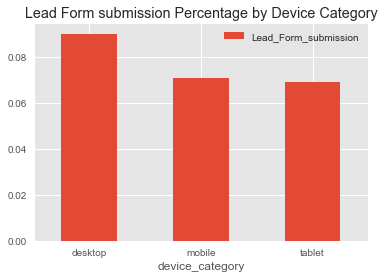

In [38]:
df[['device_category', 'Lead_Form_submission']].groupby(['device_category']).mean().plot.bar(
    title='Lead Form submission Percentage by Device Category', rot=0)
plt.show()

In [39]:
table = df.pivot_table(index='device_category', columns='Lead_Form_submission', values='Visitor_Identifier', aggfunc=np.size)
table['% of no lead form'] = (round(table[table.columns[0]]/table[table.columns[0]].sum(),4) * 100).astype(str) + '%'
table['% of lead form'] = (round(table[table.columns[1]]/table[table.columns[1]].sum(),4) * 100).astype(str) + '%'
print(table)

Lead_Form_submission        0       1 % of no lead form       % of lead form
device_category                                                             
desktop               10735.0  1061.0            52.32%  58.879999999999995%
mobile                 8757.0   665.0            42.68%                36.9%
tablet                 1026.0    76.0              5.0%                4.22%


Note: device category for users between Lead_form_submission has no obvious difference seen. 

In [40]:
df.non_shopper.value_counts()

No     19763
Yes     2557
Name: non_shopper, dtype: int64

In [41]:
df[['non_shopper', 'Lead_Form_submission']].groupby(['non_shopper']).mean()

,Lead_Form_submission
non_shopper,
No,0.087133
Yes,0.031287


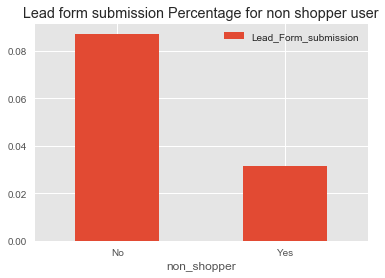

In [42]:
df[['non_shopper', 'Lead_Form_submission']].groupby(['non_shopper']).mean().plot.bar(
    title='Lead form submission Percentage for non shopper user', rot=0)
plt.show()

In [43]:
table = df.pivot_table(index='non_shopper', columns='Lead_Form_submission', values='Visitor_Identifier', aggfunc=np.size)
table['% of no lead form'] = (round(table[table.columns[0]]/table[table.columns[0]].sum(),4) * 100).astype(str) + '%'
table['% of lead form'] = (round(table[table.columns[1]]/table[table.columns[1]].sum(),4) * 100).astype(str) + '%'
print(table)

Lead_Form_submission        0       1   % of no lead form % of lead form
non_shopper                                                             
No                    18041.0  1722.0  87.92999999999999%         95.56%
Yes                    2477.0    80.0              12.07%          4.44%


Note: No_shopper = Yes has lower chance to sumbmit lead form

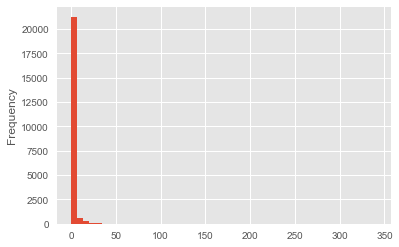

In [44]:
df.pageviews.plot.hist(bins=50)

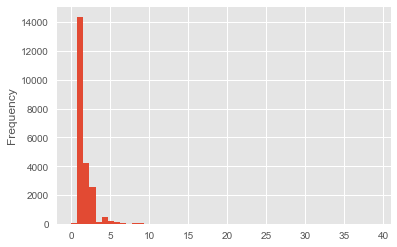

In [45]:
df.Pages_Session.plot.hist(bins=50)

In [46]:
df[df['Pages_Session']>15]['Lead_Form_submission'].value_counts()

0    11
1     5
Name: Lead_Form_submission, dtype: int64

In [47]:
df.groupby(['Lead_Form_submission']).Pages_Session.mean()

Lead_Form_submission
0    1.535539
1    2.789290
Name: Pages_Session, dtype: float64

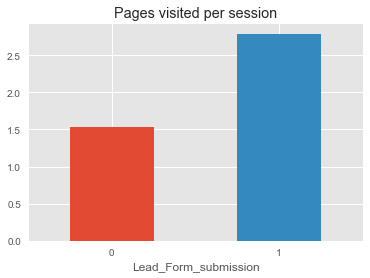

In [48]:
df.groupby(['Lead_Form_submission']).Pages_Session.mean().plot.bar(title='Pages visited per session', rot=0)
plt.show()

Note: Pages_session is avearge pages visited per session. the outliers don't seem to be impossible. Keep them for now. 

In [49]:
s1m = df[df.Session_1plus_minute>0].groupby(['Lead_Form_submission']).size()/df.groupby(['Lead_Form_submission']).size()
print(s1m)

Lead_Form_submission
0    0.183156
1    0.953940
dtype: float64


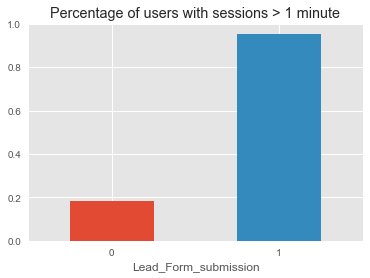

In [50]:
s1m.plot.bar(title='Percentage of users with sessions > 1 minute', rot=0)
plt.show()

In [51]:
df[df['Session_1plus_minute']>0].groupby(['Lead_Form_submission']).size()

Lead_Form_submission
0    3758
1    1719
dtype: int64

In [52]:
df[(df['Session_5plus_minutes']==1)&(df['Session_3plus_minutes']==0)]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission


In [53]:
df[(df['Session_5plus_minutes']==1)&(df['Session_1plus_minute']==0)]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission


In [54]:
df[(df['Session_5plus_pages']==1)&(df['Session_3plus_pages']==0)]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission


Note: session minutes and pages values are correlated that Session_5plus_minutes is subset of Session_1plus_minute and Session_3plus_minutes; Session_5plus_pages is subset of Session_3plus_pages

In [55]:
df.groupby(['Lead_Form_submission']).sessions.mean()

Lead_Form_submission
0    1.458427
1    1.140400
Name: sessions, dtype: float64

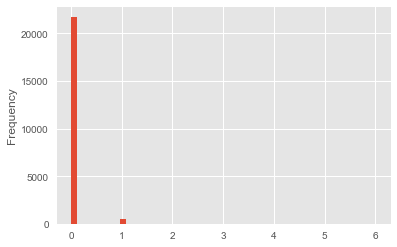

In [56]:
df.Unique_Views2_BU.plot.hist(bins=50)

In [57]:
print('Unique_Views2_BU 99% quantile: ', df.Unique_Views2_BU.quantile(0.99))
print('Unique_Views2_BU max value: ', df.Unique_Views2_BU.max())

Unique_Views2_BU 99% quantile:  1.0
Unique_Views2_BU max value:  6


In [58]:
df[df['Unique_Views2_BU']>1]['Lead_Form_submission'].value_counts()

0    41
1     8
Name: Lead_Form_submission, dtype: int64

Note: outliers for feature Unique_Views2_BU, extreme values are seen more for non Lead_form_submission users. max value 6 isn't seem impssible. keep it as for now. 

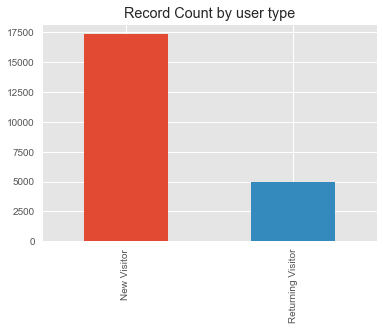

In [59]:
df.user_type.value_counts().plot.bar(title='Record Count by user type')
plt.show()

In [60]:
df[['user_type', 'Lead_Form_submission']].groupby(['user_type']).mean()

,Lead_Form_submission
user_type,
New Visitor,0.087594
Returning Visitor,0.056914


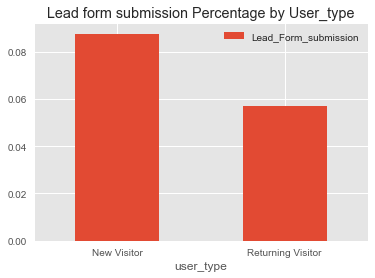

In [61]:
df[['user_type', 'Lead_Form_submission']].groupby(['user_type']).mean().plot.bar(
    title='Lead form submission Percentage by User_type', rot=0)
plt.show()

In [62]:
table = df.pivot_table(index='user_type', columns='Lead_Form_submission', values='Visitor_Identifier', aggfunc=np.size)
table['% of no lead form'] = (round(table[table.columns[0]]/table[table.columns[0]].sum(),4) * 100).astype(str) + '%'
table['% of lead form'] = (round(table[table.columns[1]]/table[table.columns[1]].sum(),4) * 100).astype(str) + '%'
print(table)

Lead_Form_submission        0       1    % of no lead form      % of lead form
user_type                                                                     
New Visitor           15812.0  1518.0               77.06%  84.24000000000001%
Returning Visitor      4706.0   284.0  22.939999999999998%              15.76%


Note: new visitor has slighterly higher chance to submit lead form 

In [63]:
# by observing data, it seems that Pages_session * sessions = pageviews.  
df[(df.Pages_Session * df.sessions - df.pageviews)>0.5]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission


In [64]:
# session duration can also be calculated.
df[(df.Avg_Session_Duration * df.sessions - df.session_duration)>0.5]

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead_Form_submission


pageviews and session_duration as total count is correlated to the average and sessions. Multicolliearity affect regression model and will drop the total count features pageviews and session_duration

## check feature correaltions

In [65]:
# # decorrelate # of session at various time durations
df['Session_1_minute'] = df.Session_1plus_minute-df.Session_3plus_minutes
df['Session_3_minutes'] = df.Session_3plus_minutes-df.Session_5plus_minutes
df['Session_3_pages'] = df.Session_3plus_pages-df.Session_5plus_pages

In [66]:
corr_features = ['Avg_Session_Duration', 'avg_time_on_page',
       'Pages_Session', 'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_5plus_minutes',  'Session_1_minute', 
        'Session_3_minutes', 'Session_3plus_pages','Session_5plus_pages', 'Session_3_pages',
       'sessions', 'Unique_Views2_BU', 'Lead_Form_submission']
corr = df[corr_features].corr()
corr

,Avg_Session_Duration,avg_time_on_page,Pages_Session,Session_1plus_minute,Session_3plus_minutes,Session_5plus_minutes,Session_1_minute,Session_3_minutes,Session_3plus_pages,Session_5plus_pages,Session_3_pages,sessions,Unique_Views2_BU,Lead_Form_submission
Avg_Session_Duration,1.000000,0.668975,0.378384,0.380241,0.441553,0.449299,0.054191,0.138353,0.228006,0.227616,0.159326,0.032929,0.136874,0.238413
avg_time_on_page,0.668975,1.000000,0.169388,0.399804,0.444078,0.452135,0.087633,0.138518,0.101917,0.059560,0.100466,0.159074,0.056804,0.228240
Pages_Session,0.378384,0.169388,1.000000,0.300647,0.245315,0.205664,0.200434,0.179847,0.444795,0.485251,0.282233,0.013588,0.230543,0.271088
Session_1plus_minute,0.380241,0.399804,0.300647,1.000000,0.853059,0.807026,0.610354,0.410204,0.600082,0.444008,0.526835,0.478673,0.123625,0.284648
Session_3plus_minutes,0.441553,0.444078,0.245315,0.853059,1.000000,0.930821,0.107323,0.516515,0.600468,0.459422,0.516684,0.502634,0.124632,0.132997
Session_5plus_minutes,0.449299,0.452135,0.205664,0.807026,0.930821,1.000000,0.124632,0.167834,0.577350,0.445620,0.494098,0.512099,0.104807,0.069698
Session_1_minute,0.054191,0.087633,0.200434,0.610354,0.107323,0.124632,1.000000,-0.002515,0.231821,0.148562,0.219450,0.149012,0.046351,0.340452
Session_3_minutes,0.138353,0.138518,0.179847,0.410204,0.516515,0.167834,-0.002515,1.000000,0.266989,0.195172,0.236049,0.155976,0.090621,0.195443
Session_3plus_pages,0.228006,0.101917,0.444795,0.600082,0.600468,0.577350,0.231821,0.266989,1.000000,0.733876,0.882124,0.338724,0.174632,0.049654
Session_5plus_pages,0.227616,0.059560,0.485251,0.444008,0.459422,0.445620,0.148562,0.195172,0.733876,1.000000,0.327416,0.231098,0.219894,0.038793


Text(0.5,1,'Correlation Matrix')

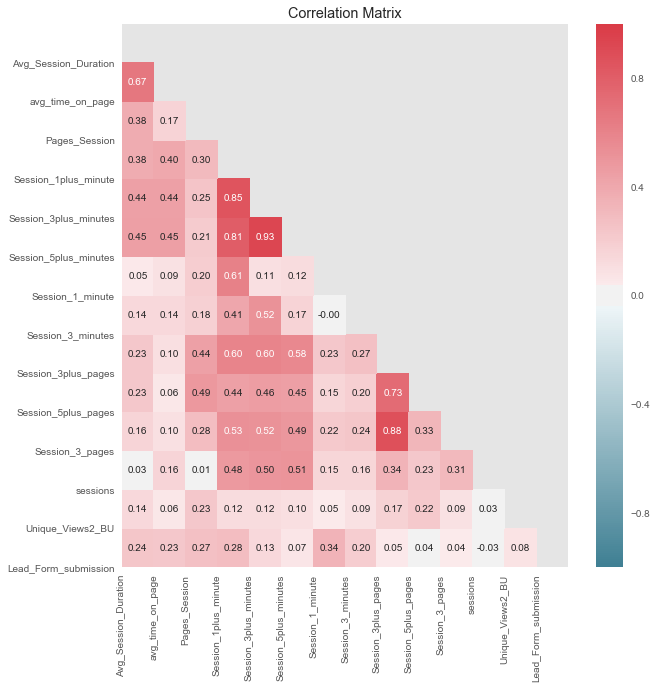

In [67]:
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
    
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns[::-1])
plt.title('Correlation Matrix')

Note: Session_1plus_minute has high correlation with other session variables
by subtracting the correated part, Session_1_minute, Session_3_minutes, Session_3_pages have much lower correlation with other features.

In [68]:
def hist_active_vs_churn(df, col_name):
    Lead_Form_submission = df['Lead_Form_submission'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (6,4))
    axes[0].hist(df[Lead_Form_submission][col_name].values, bins=50)
    axes[0].set_title("Users Submitted Lead Form")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[0].set_yscale('log')
    axes[1].hist(df[~Lead_Form_submission][col_name].values, bins=50)
    axes[1].set_title("Users don't Submit Lead Form")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    axes[1].set_yscale('log')
    fig.tight_layout()
    plt.show()

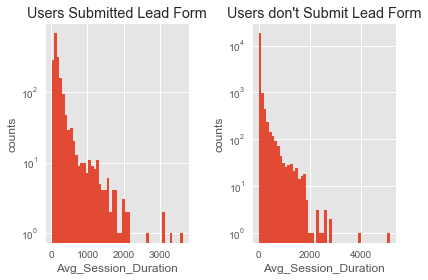

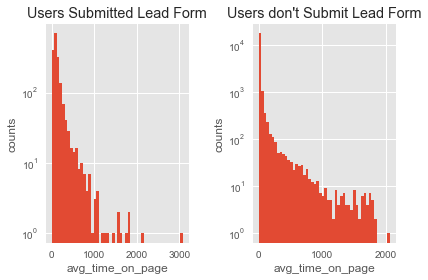

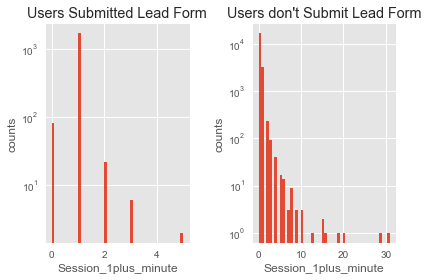

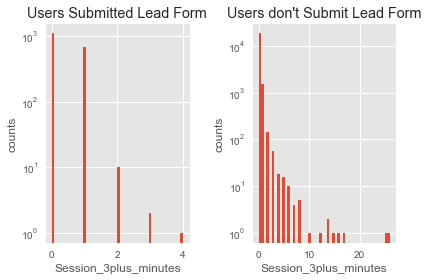

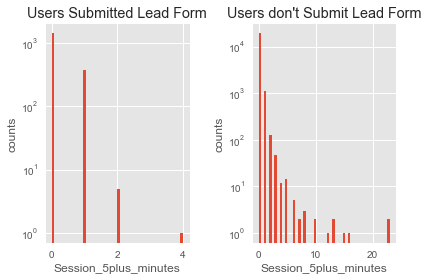

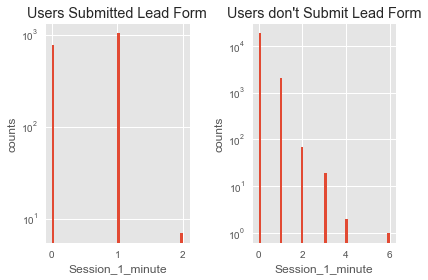

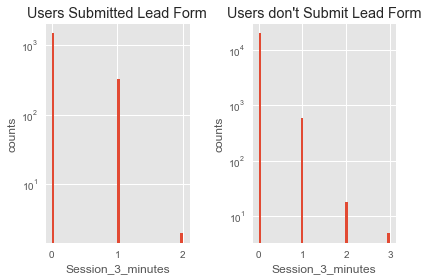

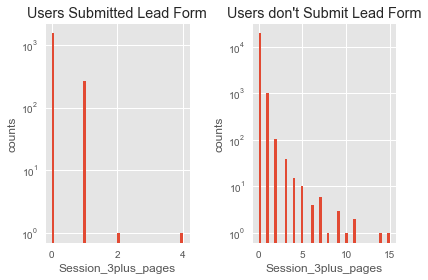

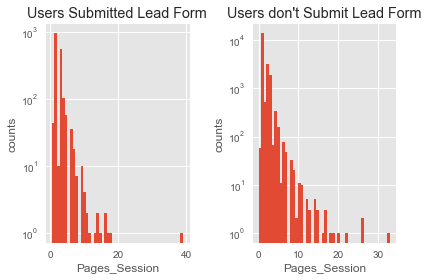

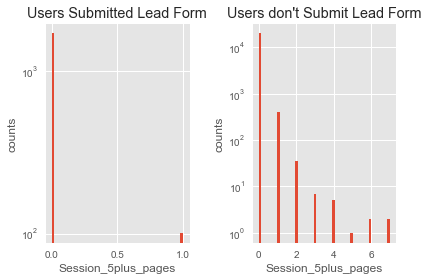

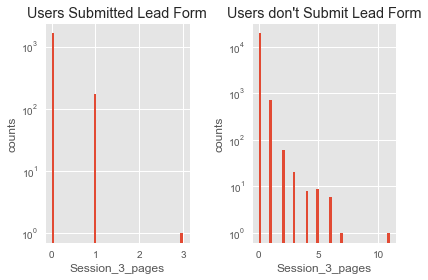

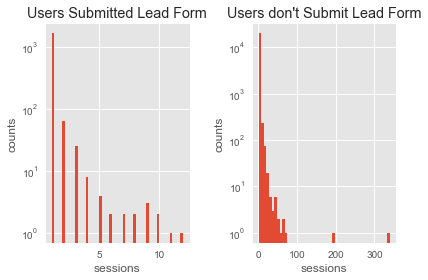

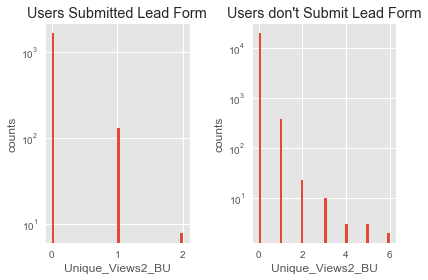

In [69]:
# Plot numeric feature to target value association
features = ['Avg_Session_Duration', 'avg_time_on_page',
       'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_5plus_minutes',  'Session_1_minute', 
        'Session_3_minutes', 'Session_3plus_pages','Pages_Session', 'Session_5plus_pages', 'Session_3_pages',
       'sessions', 'Unique_Views2_BU']
for col in features:
    hist_active_vs_churn(df, col)

# EDA Summary
1. outliers are seen in some numeric metrics  - outliers to be processed
2. Multilinearity among features, e.g.Session_1plus_minute is highly correlated to Session_3plus_minutes and Session_5plus_minutes; Average and Total session measures both exist which are correlated to each other
3. a few numeric features have higher correlation with target variable than others. e.g. Avg_Session_Duration, Session_1plus_minute, average time on page, pages session

# Data Cleaning and feature engineering

In [70]:
# check null values
df.isnull().sum()

Visitor_Identifier       0
Avg_Session_Duration     0
avg_time_on_page         0
Channel_Grouping         0
device_category          0
non_shopper              0
Pages_Session            0
pageviews                0
Session_1plus_minute     0
Session_3plus_minutes    0
Session_3plus_pages      0
Session_5plus_minutes    0
Session_5plus_pages      0
session_duration         0
sessions                 0
Unique_Views2_BU         0
user_type                0
Lead_Form_submission     0
Session_1_minute         0
Session_3_minutes        0
Session_3_pages          0
dtype: int64

Note: no null values in this data set

In [71]:
df.shape

(22320, 21)

In [72]:
# drop two redundant features which has totals, use average features
df.drop(['pageviews', 'session_duration'], axis=1, inplace=True)

In [73]:
# drop columns Visitor_Identifier with all distinct values and Channel_Grouping which has same value. 
# those variables have no predicting power.
df.drop(['Visitor_Identifier', 'Channel_Grouping'], axis=1, inplace=True)

## Transform Data

In [74]:
df[features].describe()

,Avg_Session_Duration,avg_time_on_page,Session_1plus_minute,Session_3plus_minutes,Session_5plus_minutes,Session_1_minute,Session_3_minutes,Session_3plus_pages,Pages_Session,Session_5plus_pages,Session_3_pages,sessions,Unique_Views2_BU
count,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.000000,22320.00000,22320.000000,22320.000000
mean,85.618609,43.118844,0.290636,0.142294,0.098970,0.148342,0.043324,0.083333,1.636760,0.028853,0.05448,1.432751,0.028943
std,206.827343,146.374886,0.714863,0.569553,0.494713,0.375193,0.211153,0.416784,1.259972,0.207764,0.29963,3.404474,0.201400
min,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
50%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
75%,53.000000,22.812500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,1.000000,0.000000
max,5144.500000,3080.000000,31.000000,26.000000,23.000000,6.000000,3.000000,15.000000,39.000000,7.000000,11.00000,340.000000,6.000000


# Outlier processing

In [75]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5 * IQR
print('Upper Limit for Numeric Features:\n', Upper)

Upper Limit for Numeric Features:
 Avg_Session_Duration     101.00000
avg_time_on_page          57.03125
Session_1plus_minute       0.00000
Session_3plus_minutes      0.00000
Session_5plus_minutes      0.00000
Session_1_minute           0.00000
Session_3_minutes          0.00000
Session_3plus_pages        0.00000
Pages_Session              3.50000
Session_5plus_pages        0.00000
Session_3_pages            0.00000
sessions                   1.00000
Unique_Views2_BU           0.00000
dtype: float64


In [76]:
df['Avg_Session_Duration'] = df['Avg_Session_Duration'].clip_upper(Upper['Avg_Session_Duration'])

In [77]:
df['avg_time_on_page'] = df['avg_time_on_page'].clip_upper(Upper['avg_time_on_page'])

In [78]:
df[df.Session_1plus_minute>10]

,Avg_Session_Duration,avg_time_on_page,device_category,non_shopper,Pages_Session,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,sessions,Unique_Views2_BU,user_type,Lead_Form_submission,Session_1_minute,Session_3_minutes,Session_3_pages
939,101.0,57.03125,desktop,Yes,2.89,15,14,11,13,5,38,0,Returning Visitor,0,1,1,6
3208,101.0,57.03125,desktop,No,1.52,13,12,3,10,0,42,0,Returning Visitor,0,1,2,3
6435,101.0,57.03125,desktop,No,3.00,19,16,11,15,7,47,2,Returning Visitor,0,3,1,4
7172,101.0,57.03125,desktop,Yes,2.69,16,14,9,13,4,42,0,Returning Visitor,0,2,1,5
14830,101.0,57.03125,desktop,Yes,1.78,31,25,5,23,0,66,0,Returning Visitor,0,6,2,5
25559,101.0,57.03125,desktop,Yes,1.27,29,26,3,23,1,193,0,Returning Visitor,0,3,3,2
45454,101.0,57.03125,desktop,Yes,2.64,15,15,15,12,4,75,0,Returning Visitor,0,0,3,11
45920,101.0,57.03125,desktop,Yes,2.04,20,17,7,16,1,48,0,Returning Visitor,0,3,1,6


Note: big values for Session_1plus_minute doesn't seem totally impossible. Keep them for now. 

In [79]:
# one-hot encoder for categorical variables
col_category = ['device_category', 'non_shopper', 'user_type']
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [80]:
df_dummies.head(2)

,device_category_desktop,device_category_mobile,device_category_tablet,non_shopper_No,non_shopper_Yes,user_type_New Visitor,user_type_Returning Visitor
0,1,0,0,0,1,0,1
2,1,0,0,0,1,0,1


In [81]:
df = df.join(df_dummies)
df.head(2)

,Avg_Session_Duration,avg_time_on_page,device_category,non_shopper,Pages_Session,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,...,Session_1_minute,Session_3_minutes,Session_3_pages,device_category_desktop,device_category_mobile,device_category_tablet,non_shopper_No,non_shopper_Yes,user_type_New Visitor,user_type_Returning Visitor
0,101.0,57.03125,desktop,Yes,2.0,1,1,1,1,0,...,0,0,1,1,0,0,0,1,0,1
2,101.0,54.00000,desktop,Yes,3.0,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,1


In [82]:
df.columns

Index(['Avg_Session_Duration', 'avg_time_on_page', 'device_category',
       'non_shopper', 'Pages_Session', 'Session_1plus_minute',
       'Session_3plus_minutes', 'Session_3plus_pages', 'Session_5plus_minutes',
       'Session_5plus_pages', 'sessions', 'Unique_Views2_BU', 'user_type',
       'Lead_Form_submission', 'Session_1_minute', 'Session_3_minutes',
       'Session_3_pages', 'device_category_desktop', 'device_category_mobile',
       'device_category_tablet', 'non_shopper_No', 'non_shopper_Yes',
       'user_type_New Visitor', 'user_type_Returning Visitor'],
      dtype='object')

In [83]:
selected_columns = ['Avg_Session_Duration', 'avg_time_on_page', 
        'Pages_Session', 'Session_1plus_minute',
       'Session_3plus_minutes', 'Session_3plus_pages', 'Session_5plus_minutes',
       'Session_5plus_pages', 'sessions', 'Unique_Views2_BU', 'Session_1_minute', 'Session_3_minutes',
       'Session_3_pages','device_category_desktop',
       'device_category_mobile', 'device_category_tablet', 'non_shopper_No',
       'non_shopper_Yes', 'user_type_New Visitor',
       'user_type_Returning Visitor', 'Lead_Form_submission' ]

# Save processed data to file

In [84]:
cleaned_data = 'cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data, index=False)

## Load processed data for modeling

In [85]:
df = pd.read_csv('cleaned_data.csv')

In [86]:
# original features for Session_1plus_minute, excluded Session_3plus_minutes, Session_3plus_minutes 
# and Session_5plus_pages to decrease correlation
features_1 = ['Avg_Session_Duration', 'avg_time_on_page', 
        'Pages_Session', 'Session_1plus_minute',
       'Session_3plus_pages', 'sessions', 'Unique_Views2_BU', 'device_category_desktop',
       'device_category_mobile', 'device_category_tablet', 'non_shopper_No',
       'non_shopper_Yes', 'user_type_New Visitor',
       'user_type_Returning Visitor']

In [87]:
# use transformed features with lower correation on Session_1_minute, Session_3_minutes, Session_3_pages
features_2 = ['Avg_Session_Duration', 'avg_time_on_page', 
        'Pages_Session', 'Session_5plus_minutes',
       'Session_5plus_pages', 'sessions', 'Unique_Views2_BU', 'Session_1_minute', 'Session_3_minutes',
       'Session_3_pages','device_category_desktop',
       'device_category_mobile', 'device_category_tablet', 'non_shopper_No',
       'non_shopper_Yes', 'user_type_New Visitor',
       'user_type_Returning Visitor']
target = 'Lead_Form_submission'

In [88]:
X_1 = df[features_1].values
X_2 = df[features_2].values
y = df['Lead_Form_submission'].values

# Resample data to create more balanced dataset - SMOTE

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm1, y_sm1 = smote.fit_sample(X_1, y)

print(X_sm1.shape, y_sm1.shape)

(41036, 14) (41036,)


In [90]:
y_sm1.mean()

0.5

In [91]:
X_sm2, y_sm2 = smote.fit_sample(X_2, y)

print(X_sm2.shape, y_sm2.shape)

(41036, 17) (41036,)


# Modeling

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [93]:
# feature scaling 
X_sm1 = scale(X_sm1)
X_sm2 = scale(X_sm2)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm1,y_sm1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sm2,y_sm2, test_size=0.2, random_state=42)

In [94]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    return all_metrics

In [95]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [96]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]
    print('Confusion_matrix for test data:\n', confusion_matrix(y_test, y_test_pred))

    # print model results
    print('\n Model result metrics: \n', get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred))
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_matrix for test data:
 [[3677  413]
 [ 241 3877]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.962166  0.957629
Accuracy   0.926282  0.920322
Precision  0.909875  0.903730
Recall     0.946159  0.941476
f1-score   0.927662  0.922217


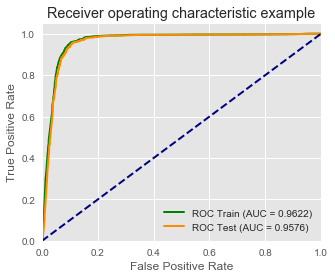

In [97]:
# logistic regression
clf11 = LogisticRegression(C=1.0, penalty='l2')

train_test_model(clf11, X_train1, y_train1, X_test1, y_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_matrix for test data:
 [[3685  405]
 [ 240 3878]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.964872  0.963147
Accuracy   0.924546  0.921418
Precision  0.910635  0.905440
Recall     0.941341  0.941719
f1-score   0.925734  0.923223


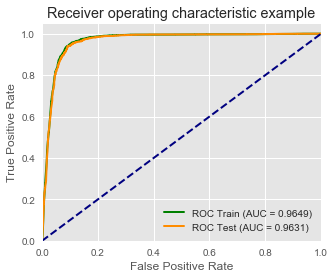

In [98]:
# Logistic regression with transformed features
clf12 = LogisticRegression(C=1, penalty='l2')

train_test_model(clf12, X_train2, y_train2, X_test2, y_test2)

In [99]:
df_coeffs = pd.DataFrame(list(zip(features_1, clf11.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['Feature', 'Coeff']
df_coeffs

,Feature,Coeff
1,avg_time_on_page,1.892506
0,Avg_Session_Duration,0.992000
2,Pages_Session,0.422559
3,Session_1plus_minute,0.384561
10,non_shopper_No,0.322391
7,device_category_desktop,0.125278
12,user_type_New Visitor,0.024597
13,user_type_Returning Visitor,-0.024597
6,Unique_Views2_BU,-0.047217
8,device_category_mobile,-0.080346


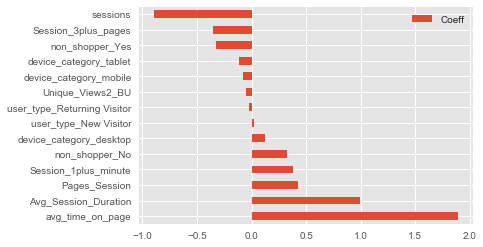

In [100]:
ax = df_coeffs.plot.barh()
t = np.arange(X_1.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['Feature'])
plt.show()

In [101]:
df_coeffs = pd.DataFrame(list(zip(features_2, clf12.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
1,avg_time_on_page,1.882415
0,Avg_Session_Duration,1.173111
2,Pages_Session,0.479313
7,Session_1_minute,0.346163
13,non_shopper_No,0.330155
10,device_category_desktop,0.114370
8,Session_3_minutes,0.080169
6,Unique_Views2_BU,0.007714
16,user_type_Returning Visitor,0.005141
15,user_type_New Visitor,-0.005141


Note: Logistic regression result indicates following. 
1. Training performance and test performance are very close and no much overfitting.
2. AUC 0.96 is good performance. This could be improved with further parameter tuning or feature selection.
3. using features with less correlation improved model performance from 0.9608 to 0.9648 on training data.
4. avg_time_on_page, Avg_Session_Duration, Pages_Session and sessions are important features. 

There could be nigher performance with tree based models. let's try it. 

Confusion_matrix for test data:
 [[3776  314]
 [  88 4030]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.982266  0.977146
Accuracy   0.955800  0.951023
Precision  0.931379  0.927716
Recall     0.984024  0.978630
f1-score   0.956978  0.952494


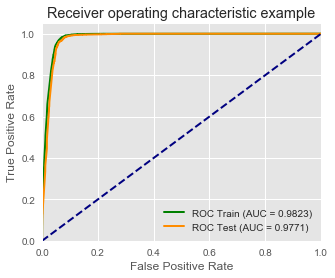

Confusion_matrix for test data:
 [[3792  298]
 [  77 4041]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.984496  0.978800
Accuracy   0.961131  0.954313
Precision  0.938784  0.931321
Recall     0.986524  0.981302
f1-score   0.962062  0.955658


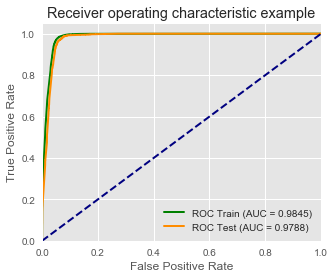

In [102]:
parameters_1 = {'n_estimators': 100,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 21,
              'n_jobs': -1
              }
parameters_2 = {'n_estimators': 150,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 5,
              'random_state': 21,
              'n_jobs': -1
              }

clf21 = RandomForestClassifier(**parameters_1)
clf22 = RandomForestClassifier(**parameters_2)

train_test_model(clf21, X_train1, y_train1, X_test1, y_test1)
train_test_model(clf22, X_train1, y_train1, X_test1, y_test1)

In [103]:
df_coeffs = pd.DataFrame(list(zip(features_1, clf21.feature_importances_, clf22.feature_importances_))).sort_values(by=[2], ascending=False)
df_coeffs.columns = ['Feature', 'Model_1_Importance', 'Model_2_Importance']
df_coeffs

,Feature,Model_1_Importance,Model_2_Importance
1,avg_time_on_page,0.337523,0.333257
3,Session_1plus_minute,0.231825,0.236652
0,Avg_Session_Duration,0.189876,0.165284
2,Pages_Session,0.119329,0.132547
11,non_shopper_Yes,0.020492,0.024982
10,non_shopper_No,0.023289,0.019714
5,sessions,0.016349,0.018573
8,device_category_mobile,0.012429,0.014244
7,device_category_desktop,0.012866,0.013622
13,user_type_Returning Visitor,0.011649,0.012217


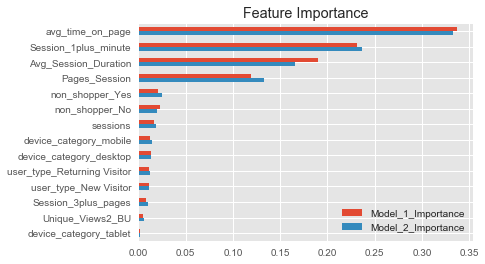

In [104]:
ax = df_coeffs.plot.barh(title='Feature Importance')
t = np.arange(X_1.shape[1])
ax.set_yticks(t)
ax.invert_yaxis()
ax.set_yticklabels(df_coeffs['Feature'])
plt.show()

In [105]:
df_coeffs = pd.DataFrame(list(zip(features_1, clf21.feature_importances_, clf22.feature_importances_))).sort_values(by=[2], ascending=False)
df_coeffs.columns = ['Feature', 'Model_1_Importance', 'MOdel_2_Importance']
print(df_coeffs)

                        Feature  Model_1_Importance  MOdel_2_Importance
1              avg_time_on_page            0.337523            0.333257
3          Session_1plus_minute            0.231825            0.236652
0          Avg_Session_Duration            0.189876            0.165284
2                 Pages_Session            0.119329            0.132547
11              non_shopper_Yes            0.020492            0.024982
10               non_shopper_No            0.023289            0.019714
5                      sessions            0.016349            0.018573
8        device_category_mobile            0.012429            0.014244
7       device_category_desktop            0.012866            0.013622
13  user_type_Returning Visitor            0.011649            0.012217
12        user_type_New Visitor            0.010803            0.011537
4           Session_3plus_pages            0.007871            0.009808
6              Unique_Views2_BU            0.004497            0

Note: Random Foreset model is better than logistic regression model. 
1. model achieved very good performance with AUC 0.984. 
2. training AUC 0.984 is better than test 0.979 indicating some overfitting
3. increase number of trees improved model performance. this can be further tuned to achieve better result. 
4. avg_time_on_page, Avg_Session_Duration, Session_1plus_minute, Pages_Session are most important features. 
5. Random forest can handle multicolinearity better than logistic regression. when training with dataset2 with transformed features, no much impact on performance.

Try boosting tree to see if further performance improvement can be achived, also evaluate the overfitting.

Confusion_matrix for test data:
 [[3825  265]
 [  65 4053]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.986914  0.981854
Accuracy   0.967954  0.959795
Precision  0.948615  0.938629
Recall     0.989451  0.984216
f1-score   0.968603  0.960882


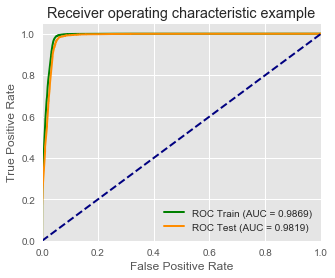

Confusion_matrix for test data:
 [[3828  262]
 [  70 4048]]

 Model result metrics: 
               train      test
metrics                      
AUC        0.987898  0.982288
Accuracy   0.969569  0.959552
Precision  0.950928  0.939211
Recall     0.990183  0.983001
f1-score   0.970159  0.960607


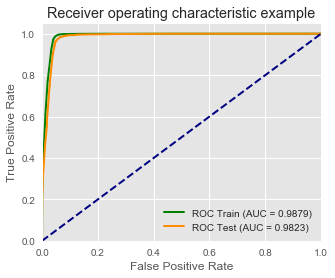

In [106]:
# try with boosting tree model
parameters_1 = {
     'n_estimators': 100,
     'max_depth': 5,
     'learning_rate': 0.2,
     'subsample': 0.7,
     'max_features':0.8,
     'random_state': 21
 }

parameters_2 = {
     'n_estimators': 150,
     'max_depth': 5,
     'learning_rate': 0.2,
     'subsample': 0.6,
     'max_features':0.7,
     'random_state': 21
 }

clf31 = GradientBoostingClassifier(**parameters_1)
clf32 = GradientBoostingClassifier(**parameters_2)

train_test_model(clf31, X_train1, y_train1, X_test1, y_test1)
train_test_model(clf32, X_train1, y_train1, X_test1, y_test1)

In [107]:
df_coeffs = pd.DataFrame(list(zip(features_1, clf31.feature_importances_, clf32.feature_importances_))).sort_values(by=[2], ascending=False)
df_coeffs.columns = ['Feature', 'Model_1_Importance', 'Model_2_Importance']
print(df_coeffs)

                        Feature  Model_1_Importance  Model_2_Importance
1              avg_time_on_page            0.495840            0.460584
0          Avg_Session_Duration            0.047080            0.281084
2                 Pages_Session            0.021633            0.057565
3          Session_1plus_minute            0.287310            0.057000
11              non_shopper_Yes            0.042934            0.034326
5                      sessions            0.026632            0.025586
10               non_shopper_No            0.013310            0.017657
7       device_category_desktop            0.016058            0.014857
8        device_category_mobile            0.014618            0.014379
13  user_type_Returning Visitor            0.012581            0.013342
12        user_type_New Visitor            0.010096            0.010018
6              Unique_Views2_BU            0.004594            0.005901
4           Session_3plus_pages            0.005181            0

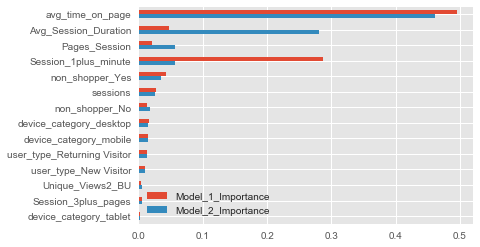

In [108]:
ax = df_coeffs.plot.barh()
t = np.arange(X_1.shape[1])
ax.set_yticks(t)
ax.invert_yaxis()
ax.set_yticklabels(df_coeffs['Feature'])
plt.show()

Note: Gradient boosting model is better than logistic regression model and random forest. 
1. model performance is better and achieved close to 0.99 AUC for training data and 0.98 testing AUC
2. there is overfitting in the model and can be further tuned to decrease that. 
3. avg_time_on_page, Avg_Session_Duration, Page Sessions, Session_1plus_minute are most important features. 

# Conclusion